In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
import plotly.io as pio
pio.renderers.default='notebook'

In [4]:
sns.set_theme()

In [84]:
# dataset 
df = pd.read_csv(r"E:\projects\classification\train.csv")

In [6]:
df.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
df.corr()

age       day       dur  num_calls
age        1.000000 -0.009120 -0.004648    0.00476
day       -0.009120  1.000000 -0.030206    0.16249
dur       -0.004648 -0.030206  1.000000   -0.08457
num_calls  0.004760  0.162490 -0.084570    1.00000

In [9]:
df.describe()

age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000000      1.000000      0.000000      1.000000
25%       33.000000      8.000000    103.000000      1.000000
50%       39.000000     16.000000    180.000000      2.000000
75%       48.000000     21.000000    319.000000      3.000000
max       95.000000     31.000000   4918.000000     63.000000

In [10]:
object_list = []
int64_list = []
for i in list(df.columns):
    if df[str(i)].dtype == "object":
        object_list.append(i)
    elif df[str(i)].dtype == "int64":
        int64_list.append(i)

In [11]:
print("'object datatype'", ":" , object_list)
print("'int64 datatype'", ":" , int64_list)

'object datatype' : ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']
'int64 datatype' : ['age', 'day', 'dur', 'num_calls']


In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [86]:
# converting the target variable into category datatype
df["y"] = df["y"].astype("category")

In [14]:
df.duplicated().sum()

6

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
max(df.age), min(df.age)

(95, 18)

In [18]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [21]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [22]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [24]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

# EDA and DESCRIPTIVE STATS

### Distribution of the features

In [25]:
x, y = list(df["y"].value_counts().index), list(df["y"].value_counts(normalize=True).values)
labels = {"x":"target variable", "y":"percentage"}
fig1 = px.bar(x=x, y=y, title="PERCENTAGE OF THE TWO CLASSES", template="plotly_dark", text_auto=".5", width=650, height=500, labels=labels)
fig1.update_traces(marker_color=" #FF5733", width=.2, textposition="outside")
fig1.show()

only 11.7 % are converted as custumers and the other 88.3 % of people havent bought any insurance.

In [26]:
fig2 = px.histogram(df, "age", nbins=10, title="DISTRIBUTION OF AGE WITH HUE AS MARITAL STATUS", color="marital", template="plotly_dark", text_auto=".5", width=900, height=700)
fig2.show()

Text(0.5, 1.0, 'Distribution of age')

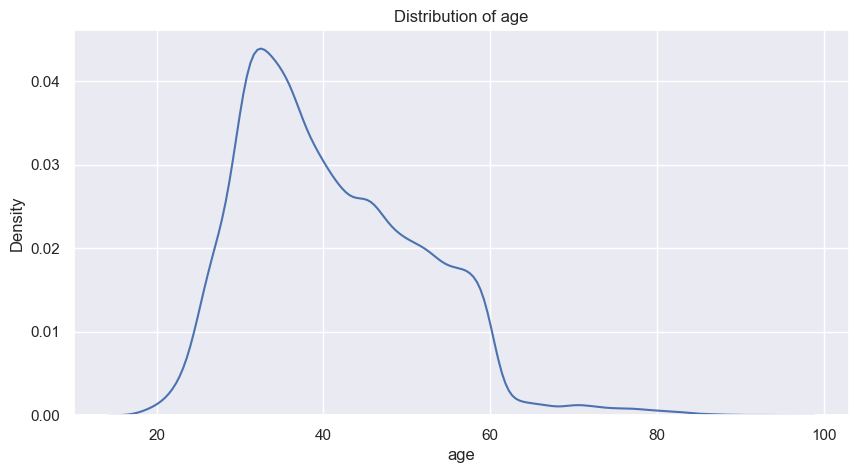

In [27]:
plt.figure(figsize=(10, 5))
fig3 = sns.kdeplot(x=df["age"])
plt.title("Distribution of age")

Text(0.5, 1.0, 'Distribution of age with hue as marital status')

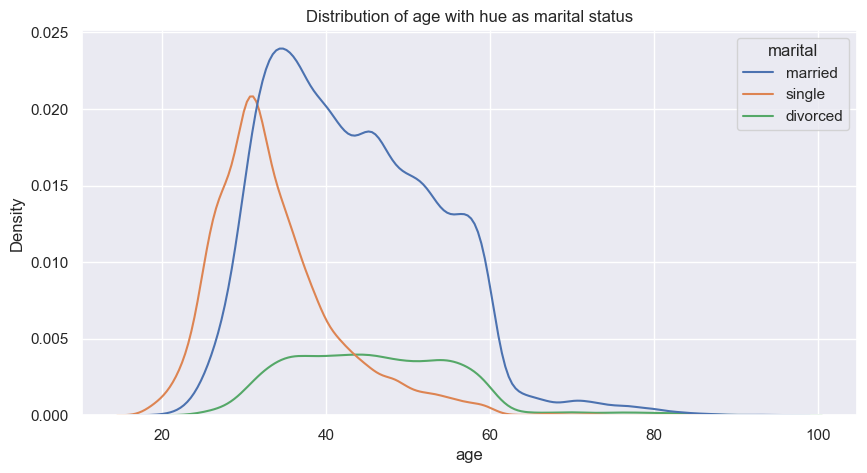

In [28]:
plt.figure(figsize=(10, 5))
fig4 = sns.kdeplot(x=df["age"], hue=df["marital"])
plt.title("Distribution of age with hue as marital status")

Text(0.5, 0, 'call duration')

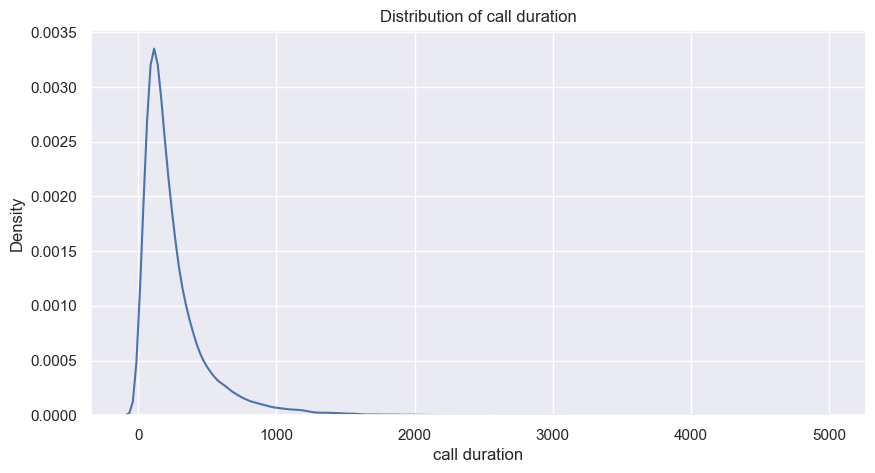

In [29]:
plt.figure(figsize=(10, 5))
fig5 = sns.kdeplot(x=df["dur"])
plt.title("Distribution of call duration")
plt.xlabel("call duration")

Text(0.5, 0, 'call duration')

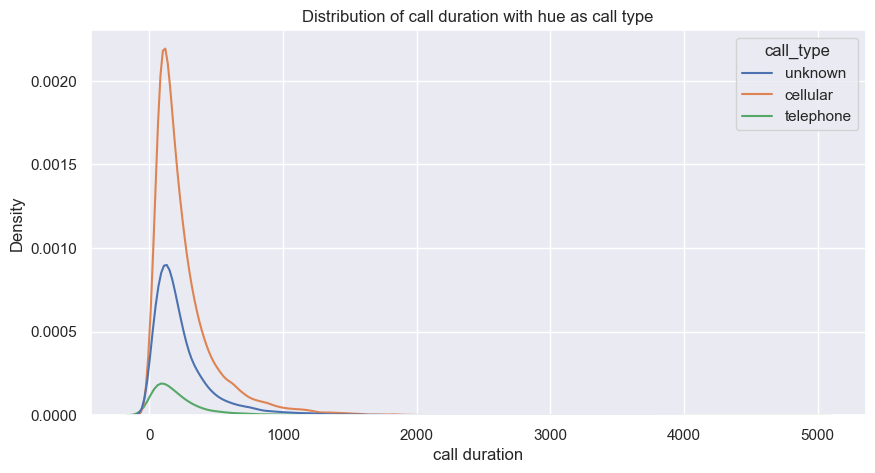

In [30]:
plt.figure(figsize=(10, 5))
fig6 = sns.kdeplot(x=df["dur"], hue=df["call_type"])
plt.title("Distribution of call duration with hue as call type")
plt.xlabel("call duration")

Text(0.5, 0, 'call number of times called')

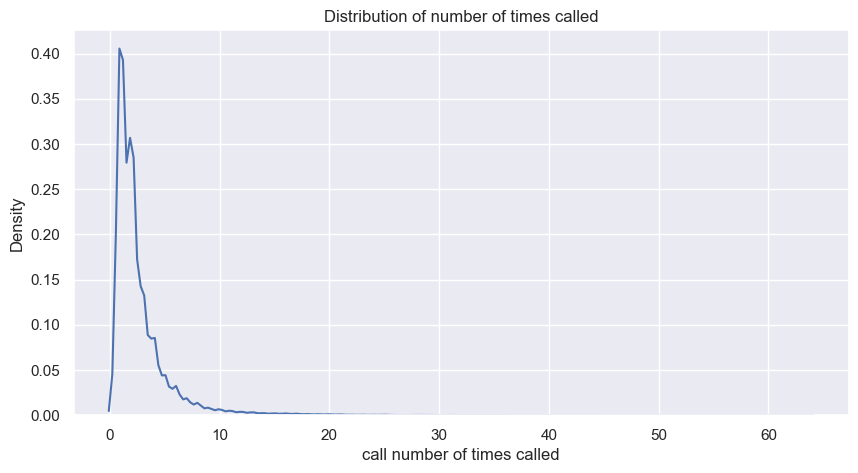

In [31]:
plt.figure(figsize=(10, 5))
fig7 = sns.kdeplot(x=df["num_calls"])
plt.title("Distribution of number of times called")
plt.xlabel("call number of times called")

In [235]:
x, y = df["job"].value_counts().index, df["job"].value_counts().values
labels = {"x":"jobs", "y":"number of instances"}
fig8 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels)
fig8.update_traces(marker_color=" #DAF7A6", textposition="outside", width=.8)
fig8.show()

In [236]:
x, y = df["marital"].value_counts().index, df["marital"].value_counts().values
labels = {"x":"marital status", "y":"number of instances"}
fig9 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels, width=650, height=450)
fig9.update_traces(marker_color=" #6600CC", textposition="outside", width=.4)
fig9.show()

In [237]:
x, y = df["education_qual"].value_counts().index, df["education_qual"].value_counts().values
labels = {"x":"educational qualification", "y":"number of instances"}
fig10 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels, width=800, height=500)
fig10.update_traces(marker_color=" #FFCC00", textposition="outside",width=.4)
fig10.show()

In [238]:
x, y = df["call_type"].value_counts().index, df["call_type"].value_counts().values
labels = {"x":"call type", "y":"number of instances"}
fig11 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels, width=600, height=450)
fig11.update_traces(marker_color=" #CC0000", textposition="outside", width=.4)
fig11.show()

In [239]:
x, y = df["mon"].value_counts().index, df["mon"].value_counts().values
labels = {"x":"month", "y":"number of instances"}
fig12 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels)
fig12.update_traces(marker_color=" #f7abb6", textposition="outside")
fig12.show()

In [37]:
x, y = df["prev_outcome"].value_counts().index, df["prev_outcome"].value_counts().values
labels = {"x":"previous outcome", "y":"number of instances"}
fig13 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels, width=700, height=500)
fig13.update_traces(marker_color=" #CC99CC", textposition="outside", width=.4)
fig13.show()

In [240]:
x, y = df["day"].value_counts().index, df["day"].value_counts().values
labels = {"x":"day of the month", "y":"number of instances"}
fig14 = px.bar(x=x, y=y, template="plotly_dark", text_auto=".5", labels=labels)
fig14.update_traces(marker_color=" #005b96", textposition="outside")
fig14.show()

### independent variable against the target variable

In [39]:
job_y = df.groupby(["job", "y"], as_index=False).count().iloc[0:,:3]
job_y = job_y.rename(columns={"age":"count"})
job_y

job    y  count
0          admin.   no   4539
1          admin.  yes    631
2     blue-collar   no   9022
3     blue-collar  yes    708
4    entrepreneur   no   1364
5    entrepreneur  yes    123
6       housemaid   no   1131
7       housemaid  yes    109
8      management   no   8156
9      management  yes   1301
10        retired   no   1748
11        retired  yes    516
12  self-employed   no   1392
13  self-employed  yes    187
14       services   no   3784
15       services  yes    369
16        student   no    669
17        student  yes    269
18     technician   no   6756
19     technician  yes    840
20     unemployed   no   1101
21     unemployed  yes    202
22        unknown   no    254
23        unknown  yes     34

In [40]:
labels = {"x":"jobs", "y":"no of instances"}
color=["#FF8000", "#FFCF75"]
fig15 = px.bar(x=job_y["job"], y=job_y["count"], color=job_y["y"], template="plotly_dark", text_auto="0.5", barmode="group", labels=labels, color_discrete_sequence=color, title="JOB vs TARGET VARIABLE")
fig15.update_traces(textposition="outside")
fig15.show()

In [41]:
marital_y = df.groupby(["marital", "y"], as_index=False).count().iloc[0:,:3]
marital_y = marital_y.rename(columns={"age":"count"})
marital_y

marital    y  count
0  divorced   no   4585
1  divorced  yes    622
2   married   no  24455
3   married  yes   2755
4    single   no  10876
5    single  yes   1912

In [42]:
labels = {"x":"marital status", "y":"no of instances"}
color=["#006699", "#FFFF81"]
fig16 = px.bar(x=marital_y["marital"], y=marital_y["count"], color=marital_y["y"], template="plotly_dark", text_auto="0.5", barmode="group", labels=labels, color_discrete_sequence=color, title="MARITAL STATUS vs TARGET VARIABLE", width=750, height=500)
fig16.update_traces(textposition="outside")
fig16.show()

In [43]:
education_qual_y = df.groupby(["education_qual", "y"], as_index=False).count().iloc[0:,:3]
education_qual_y = education_qual_y.rename(columns={"age":"count"})
education_qual_y

education_qual    y  count
0        primary   no   6259
1        primary  yes    591
2      secondary   no  20749
3      secondary  yes   2450
4       tertiary   no  11303
5       tertiary  yes   1996
6        unknown   no   1605
7        unknown  yes    252

In [44]:
labels = {"x":"education qualification", "y":"no of instances"}
color=["#fe4a49", "#2ab7ca"]
fig17 = px.bar(x=education_qual_y["education_qual"], y=education_qual_y["count"], color=education_qual_y["y"], template="plotly_dark", text_auto=".5", barmode="group", labels=labels, color_discrete_sequence=color, title="EDUCATIONAL QUALIFICATION vs TARGET VARIABLE")
fig17.update_traces(textposition="outside")
fig17.show()

In [45]:
call_type_y = df.groupby(["call_type", "y"], as_index=False).count().iloc[0:,:3]
call_type_y = call_type_y.rename(columns={"age":"count"})
call_type_y

call_type    y  count
0   cellular   no  24913
1   cellular  yes   4369
2  telephone   no   2516
3  telephone  yes    390
4    unknown   no  12487
5    unknown  yes    530

In [46]:
labels = {"x":"call type", "y":"no of instances"}
color=["#d11141", "#00b159"]
fig18 = px.bar(x=call_type_y["call_type"], y=call_type_y["count"], color=call_type_y["y"], template="plotly_dark", text_auto=".5", barmode="group", labels=labels, color_discrete_sequence=color, title="CALL TYPE vs TARGET VARIABLE", width=750, height=500)
fig18.update_traces(textposition="outside")
fig18.show()

In [47]:
month_y = df.groupby(["mon", "y"], as_index=False).count().iloc[0:,:3]
month_y = month_y.rename(columns={"age":"count"})
month_y

mon    y  count
0   apr   no   2355
1   apr  yes    577
2   aug   no   5557
3   aug  yes    688
4   dec   no    114
5   dec  yes    100
6   feb   no   2208
7   feb  yes    441
8   jan   no   1261
9   jan  yes    142
10  jul   no   6267
11  jul  yes    627
12  jun   no   4793
13  jun  yes    546
14  mar   no    229
15  mar  yes    248
16  may   no  12840
17  may  yes    925
18  nov   no   3567
19  nov  yes    403
20  oct   no    415
21  oct  yes    323
22  sep   no    310
23  sep  yes    269

In [48]:
labels = {"x":"month", "y":"no of instances"}
color=[" #00a0b0", "#ff3377"]
fig19 = px.bar(x=month_y["mon"], y=month_y["count"], color=month_y["y"], template="plotly_dark", text_auto=".5", barmode="group", labels=labels, color_discrete_sequence=color, title="MONTH vs TARGET VARIABLE")
fig19.update_traces(textposition="outside")
fig19.show()

In [49]:
prev_outcome_y = df.groupby(["prev_outcome", "y"], as_index=False).count().iloc[0:,:3]
prev_outcome_y = prev_outcome_y.rename(columns={"age":"count"})
prev_outcome_y

prev_outcome    y  count
0      failure   no   4283
1      failure  yes    618
2        other   no   1533
3        other  yes    307
4      success   no    533
5      success  yes    978
6      unknown   no  33567
7      unknown  yes   3386

In [50]:
labels = {"x":"previous outcome", "y":"no of instances"}
color=["#3d1e6d ", " #e4dcf1"]
fig20 = px.bar(x=prev_outcome_y["prev_outcome"], y=prev_outcome_y["count"], color=prev_outcome_y["y"], template="plotly_dark", text_auto="0.5", barmode="group", labels=labels, color_discrete_sequence=color, title="PREVIOUS OUTCOME vs TARGET VARIABLE")
fig20.update_traces(textposition="outside")
fig20.show()

In [51]:
day_y = df.groupby(["day", "y"], as_index=False).count().iloc[0:,:3]
day_y = day_y.rename(columns={"age":"count"})
day_y

day    y  count
0     1   no    232
1     1  yes     90
2     2   no   1110
3     2  yes    182
4     3   no    901
..  ...  ...    ...
57   29  yes    129
58   30   no   1295
59   30  yes    271
60   31   no    597
61   31  yes     46

[62 rows x 3 columns]

In [52]:
labels = {"x":"day of the month", "y":"no of instances"}
color=["#edc951", "#cc2a36"]
fig21 = px.bar(x=day_y["day"], y=day_y["count"], color=day_y["y"], template="plotly_dark", barmode="group", labels=labels, color_discrete_sequence=color, title="DAY vs TARGET VARIABLE")
fig21.show()

### Boxplots

In [53]:
fig22 = px.box(df, "age", color="marital", template="plotly_dark")
fig22.show()

In [54]:
fig23 = px.box(df, "num_calls", template="plotly_dark")
fig23.show()

In [55]:
fig24 = px.box(df, "dur", template="plotly_dark")
fig24.show()

In [56]:
labels = {"num_calls":"number of times calls", "dur":"duration of call"}
fig25 = px.scatter(df, "num_calls", "dur", color="y", labels=labels, title="NUMBER OF CALLS vs DURATION WITH HUE AS TARGET VARIABLE", template="plotly_dark")
fig25.show()

In [57]:
labels = {"num_calls":"number of times called"}
fig26 = px.scatter(df, y="num_calls", color="y", labels=labels, title="NUMBER OF TIMES CALLS WITH HUE AS TARGET VARIABLE", template="plotly_dark")
fig26.show()

In [58]:
labels = {"dur":"duration"}
fig27 = px.scatter(df, y="dur", color="y", labels=labels, title="DURATION WITH HUE AS TARGET VARIABLE", template="plotly_dark")
fig27.show()

In [59]:
# encoding yes as 1s and no as 0s
df["y"] = df["y"].map({"yes":1, "no":0})

In [60]:
# converting the target variable as integer again
df["y"] = df["y"].astype("int32")

### custumers conversion rate in every category

In [61]:
df.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome  y  
0          1      unknown  0  
1          1      unknown  0  
2          1      unknown  0  
3          1      unknown  0  
4          1      unknown  0

In [62]:
job = df.groupby("job", as_index=False)["y"].mean().sort_values(by="y", ascending=False).reset_index(drop=True)
job

job         y
0         student  0.286780
1         retired  0.227915
2      unemployed  0.155027
3      management  0.137570
4          admin.  0.122050
5   self-employed  0.118429
6         unknown  0.118056
7      technician  0.110585
8        services  0.088851
9       housemaid  0.087903
10   entrepreneur  0.082717
11    blue-collar  0.072765

In [63]:
fig28 = px.bar(job, "job", "y", template="plotly_dark")
fig28.show()

In [64]:
marital = df.groupby("marital", as_index=False)["y"].mean().sort_values(by="y", ascending=False).reset_index(drop=True)
marital

marital         y
0    single  0.149515
1  divorced  0.119455
2   married  0.101250

In [65]:
fig29 = px.bar(marital, "marital", "y", template="plotly_dark", width=700, height=500)
fig29.update_traces(width=0.3)
fig29.show()

In [66]:
education_qual = df.groupby("education_qual", as_index=False)["y"].mean().sort_values(by="y", ascending=False).reset_index(drop=True)
education_qual

education_qual         y
0       tertiary  0.150086
1        unknown  0.135703
2      secondary  0.105608
3        primary  0.086277

In [67]:
fig30 = px.bar(education_qual, "education_qual", "y", template="plotly_dark", width=700, height=500)
fig30.update_traces(width=0.4)
fig30.show()

In [68]:
call_type = df.groupby("call_type", as_index=False)["y"].mean().sort_values(by="y", ascending=False).reset_index(drop=True)
call_type

call_type         y
0   cellular  0.149204
1  telephone  0.134205
2    unknown  0.040716

In [69]:
fig31 = px.bar(call_type, "call_type", "y", template="plotly_dark", width=700, height=500)
fig31.update_traces(width=0.3)
fig31.show()

In [70]:
mon = df.groupby("mon", as_index=False)["y"].mean().sort_values(by="y", ascending=False).reset_index(drop=True)
mon

mon         y
0   mar  0.519916
1   dec  0.467290
2   sep  0.464594
3   oct  0.437669
4   apr  0.196794
5   feb  0.166478
6   aug  0.110168
7   jun  0.102266
8   nov  0.101511
9   jan  0.101212
10  jul  0.090949
11  may  0.067199

In [71]:
fig32 = px.bar(mon, "mon", "y", template="plotly_dark", width=700, height=500)
fig32.show()

In [72]:
prev_outcome = df.groupby("prev_outcome", as_index=False)["y"].mean().sort_values(by="y", ascending=False).reset_index(drop=True)
prev_outcome

prev_outcome         y
0      success  0.647253
1        other  0.166848
2      failure  0.126097
3      unknown  0.091630

In [73]:
fig33 = px.bar(prev_outcome, "prev_outcome", "y", template="plotly_dark", width=600, height=500)
fig33.update_traces(width=0.5)
fig33.show()

## FEATURE ENGINEERING

In [89]:
# converting yes as 1s and no as 0s
df["y"] = df["y"].map({"yes":1, "no":0})

In [90]:
# converting to int because we already converted it to category
df.y = df.y.astype("int32")

As the plots are showing the orders in the categories we encode the categories in 
ordinal fashion accoring to the rate of customer converted.

In [91]:
df["job"] = df["job"].map({'blue-collar':0,
 'entrepreneur':1,
 'housemaid':2,
 'services':3,
 'technician':4,
 'unknown':5,
 'self-employed':6,
 'admin.':7,
 'management':8,
 'unemployed':9,
 'retired':10,
 'student':11})

In [92]:
df["marital"] = df["marital"].map({'married':0, 'divorced':1, 'single':2})

In [93]:
df["education_qual"] = df["education_qual"].map({'primary':0, 'secondary':1, 'unknown':2, 'tertiary':3})

In [94]:
df["call_type"] = df["call_type"].map({'unknown':0, 'telephone':1, 'cellular':2})

In [95]:
df["mon"] = df["mon"].map({'may':0,
 'jul':1,
 'jan':2,
 'nov':3,
 'jun':4,
 'aug':5,
 'feb':6,
 'apr':7,
 'oct':8,
 'sep':9,
 'dec':10,
 'mar':11})

In [96]:
df["prev_outcome"] = df["prev_outcome"].map({'unknown':0, 'failure':1, 'other':2, 'success':3})

In [97]:
df.head()

age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
0   58    8        0               3          0    5    0  261          1   
1   44    4        2               1          0    5    0  151          1   
2   33    1        0               1          0    5    0   76          1   
3   47    0        0               2          0    5    0   92          1   
4   33    5        2               2          0    5    0  198          1   

   prev_outcome  y  
0             0  0  
1             0  0  
2             0  0  
3             0  0  
4             0  0

# MODEL

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score

## baseline models

In [100]:
x, y = df.drop(columns=["y"]), df["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [101]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36168, 10), (9043, 10), (36168,), (9043,))

In [111]:
def model_scores(algorithms, model_names, xtr, ytr):
    
    accuracy = []
    precision = []
    
    for algo in algorithms:
    
        model = algo
        model.fit(xtr, ytr)
        acc = accuracy_score(y_test, model.predict(x_test))
        prec = precision_score(y_test, model.predict(x_test))
        
        accuracy.append(acc)
        precision.append(prec)
        
    performance = pd.DataFrame()
    performance["model"] = model_names
    performance["precision"] = precision
    performance["accuracy"] = accuracy
    
    return performance

In [112]:
names = ["LogisticRegression", "SVC", "RandomForestClassifier", "DecisionTreeClassifier", "XGBRFClassifier", "LGBMClassifier", "CatBoostClassifier"]
algos = [LogisticRegression(n_jobs=-1), SVC(), RandomForestClassifier(n_jobs=-1), DecisionTreeClassifier(), XGBRFClassifier(), LGBMClassifier(), CatBoostClassifier()]
scores = model_scores(algos, names, x_train, y_train)

Learning rate set to 0.04768
0:	learn: 0.6351708	total: 210ms	remaining: 3m 29s
1:	learn: 0.5844908	total: 256ms	remaining: 2m 7s
2:	learn: 0.5446269	total: 297ms	remaining: 1m 38s
3:	learn: 0.5011721	total: 327ms	remaining: 1m 21s
4:	learn: 0.4625019	total: 357ms	remaining: 1m 10s
5:	learn: 0.4333107	total: 388ms	remaining: 1m 4s
6:	learn: 0.4040678	total: 420ms	remaining: 59.6s
7:	learn: 0.3826515	total: 458ms	remaining: 56.8s
8:	learn: 0.3643081	total: 499ms	remaining: 54.9s
9:	learn: 0.3483109	total: 530ms	remaining: 52.4s
10:	learn: 0.3379681	total: 563ms	remaining: 50.6s
11:	learn: 0.3236909	total: 597ms	remaining: 49.1s
12:	learn: 0.3123004	total: 627ms	remaining: 47.6s
13:	learn: 0.3036266	total: 667ms	remaining: 47s
14:	learn: 0.2956422	total: 711ms	remaining: 46.7s
15:	learn: 0.2888153	total: 741ms	remaining: 45.6s
16:	learn: 0.2829011	total: 768ms	remaining: 44.4s
17:	learn: 0.2793203	total: 788ms	remaining: 43s
18:	learn: 0.2736269	total: 819ms	remaining: 42.3s
19:	learn: 0

161:	learn: 0.1955336	total: 5.67s	remaining: 29.3s
162:	learn: 0.1953528	total: 5.71s	remaining: 29.3s
163:	learn: 0.1951887	total: 5.74s	remaining: 29.3s
164:	learn: 0.1950982	total: 5.78s	remaining: 29.2s
165:	learn: 0.1950102	total: 5.8s	remaining: 29.2s
166:	learn: 0.1948103	total: 5.83s	remaining: 29.1s
167:	learn: 0.1947053	total: 5.87s	remaining: 29.1s
168:	learn: 0.1946599	total: 5.9s	remaining: 29s
169:	learn: 0.1945718	total: 5.94s	remaining: 29s
170:	learn: 0.1944574	total: 5.97s	remaining: 29s
171:	learn: 0.1943822	total: 6s	remaining: 28.9s
172:	learn: 0.1942258	total: 6.03s	remaining: 28.8s
173:	learn: 0.1941523	total: 6.07s	remaining: 28.8s
174:	learn: 0.1940818	total: 6.1s	remaining: 28.7s
175:	learn: 0.1940184	total: 6.13s	remaining: 28.7s
176:	learn: 0.1938488	total: 6.17s	remaining: 28.7s
177:	learn: 0.1937865	total: 6.2s	remaining: 28.6s
178:	learn: 0.1936185	total: 6.23s	remaining: 28.6s
179:	learn: 0.1933689	total: 6.26s	remaining: 28.5s
180:	learn: 0.1931658	tot

324:	learn: 0.1807225	total: 11.1s	remaining: 23.1s
325:	learn: 0.1806615	total: 11.2s	remaining: 23.1s
326:	learn: 0.1805702	total: 11.2s	remaining: 23.1s
327:	learn: 0.1805042	total: 11.2s	remaining: 23s
328:	learn: 0.1804581	total: 11.3s	remaining: 23s
329:	learn: 0.1803906	total: 11.3s	remaining: 23s
330:	learn: 0.1802938	total: 11.3s	remaining: 22.9s
331:	learn: 0.1802349	total: 11.4s	remaining: 22.9s
332:	learn: 0.1802061	total: 11.4s	remaining: 22.9s
333:	learn: 0.1801277	total: 11.5s	remaining: 22.8s
334:	learn: 0.1800313	total: 11.5s	remaining: 22.8s
335:	learn: 0.1799828	total: 11.5s	remaining: 22.8s
336:	learn: 0.1799184	total: 11.6s	remaining: 22.7s
337:	learn: 0.1798615	total: 11.6s	remaining: 22.7s
338:	learn: 0.1797857	total: 11.7s	remaining: 22.7s
339:	learn: 0.1797279	total: 11.7s	remaining: 22.7s
340:	learn: 0.1796295	total: 11.7s	remaining: 22.7s
341:	learn: 0.1795907	total: 11.8s	remaining: 22.7s
342:	learn: 0.1795224	total: 11.8s	remaining: 22.6s
343:	learn: 0.1794

486:	learn: 0.1713105	total: 16.5s	remaining: 17.3s
487:	learn: 0.1712750	total: 16.5s	remaining: 17.3s
488:	learn: 0.1712354	total: 16.5s	remaining: 17.3s
489:	learn: 0.1711873	total: 16.6s	remaining: 17.2s
490:	learn: 0.1711405	total: 16.6s	remaining: 17.2s
491:	learn: 0.1710855	total: 16.6s	remaining: 17.2s
492:	learn: 0.1710110	total: 16.6s	remaining: 17.1s
493:	learn: 0.1709691	total: 16.7s	remaining: 17.1s
494:	learn: 0.1709351	total: 16.7s	remaining: 17.1s
495:	learn: 0.1708635	total: 16.7s	remaining: 17s
496:	learn: 0.1708166	total: 16.8s	remaining: 17s
497:	learn: 0.1707063	total: 16.8s	remaining: 16.9s
498:	learn: 0.1706535	total: 16.8s	remaining: 16.9s
499:	learn: 0.1706064	total: 16.9s	remaining: 16.9s
500:	learn: 0.1705443	total: 16.9s	remaining: 16.8s
501:	learn: 0.1704739	total: 16.9s	remaining: 16.8s
502:	learn: 0.1704193	total: 17s	remaining: 16.8s
503:	learn: 0.1703093	total: 17s	remaining: 16.7s
504:	learn: 0.1702811	total: 17s	remaining: 16.7s
505:	learn: 0.1702268	

647:	learn: 0.1639431	total: 21.6s	remaining: 11.7s
648:	learn: 0.1639049	total: 21.7s	remaining: 11.7s
649:	learn: 0.1638759	total: 21.7s	remaining: 11.7s
650:	learn: 0.1638333	total: 21.7s	remaining: 11.6s
651:	learn: 0.1637868	total: 21.7s	remaining: 11.6s
652:	learn: 0.1637689	total: 21.8s	remaining: 11.6s
653:	learn: 0.1637332	total: 21.8s	remaining: 11.5s
654:	learn: 0.1637120	total: 21.8s	remaining: 11.5s
655:	learn: 0.1636782	total: 21.9s	remaining: 11.5s
656:	learn: 0.1636387	total: 21.9s	remaining: 11.4s
657:	learn: 0.1635953	total: 21.9s	remaining: 11.4s
658:	learn: 0.1635537	total: 22s	remaining: 11.4s
659:	learn: 0.1635066	total: 22s	remaining: 11.3s
660:	learn: 0.1634589	total: 22s	remaining: 11.3s
661:	learn: 0.1634224	total: 22.1s	remaining: 11.3s
662:	learn: 0.1633758	total: 22.1s	remaining: 11.2s
663:	learn: 0.1633356	total: 22.1s	remaining: 11.2s
664:	learn: 0.1632558	total: 22.2s	remaining: 11.2s
665:	learn: 0.1632145	total: 22.2s	remaining: 11.1s
666:	learn: 0.1631

808:	learn: 0.1573853	total: 26.7s	remaining: 6.31s
809:	learn: 0.1573482	total: 26.8s	remaining: 6.28s
810:	learn: 0.1572925	total: 26.8s	remaining: 6.24s
811:	learn: 0.1572593	total: 26.8s	remaining: 6.21s
812:	learn: 0.1572047	total: 26.9s	remaining: 6.18s
813:	learn: 0.1571695	total: 26.9s	remaining: 6.14s
814:	learn: 0.1571318	total: 26.9s	remaining: 6.11s
815:	learn: 0.1571044	total: 26.9s	remaining: 6.08s
816:	learn: 0.1570707	total: 27s	remaining: 6.04s
817:	learn: 0.1570359	total: 27s	remaining: 6.01s
818:	learn: 0.1570021	total: 27s	remaining: 5.98s
819:	learn: 0.1569642	total: 27.1s	remaining: 5.94s
820:	learn: 0.1569379	total: 27.1s	remaining: 5.91s
821:	learn: 0.1569052	total: 27.1s	remaining: 5.88s
822:	learn: 0.1568550	total: 27.2s	remaining: 5.84s
823:	learn: 0.1568356	total: 27.2s	remaining: 5.81s
824:	learn: 0.1567909	total: 27.2s	remaining: 5.78s
825:	learn: 0.1567505	total: 27.3s	remaining: 5.74s
826:	learn: 0.1567054	total: 27.3s	remaining: 5.71s
827:	learn: 0.1566

969:	learn: 0.1514711	total: 32.1s	remaining: 992ms
970:	learn: 0.1514318	total: 32.1s	remaining: 959ms
971:	learn: 0.1514033	total: 32.2s	remaining: 926ms
972:	learn: 0.1513788	total: 32.2s	remaining: 893ms
973:	learn: 0.1513424	total: 32.2s	remaining: 860ms
974:	learn: 0.1513035	total: 32.3s	remaining: 827ms
975:	learn: 0.1512752	total: 32.3s	remaining: 794ms
976:	learn: 0.1512376	total: 32.3s	remaining: 761ms
977:	learn: 0.1512022	total: 32.4s	remaining: 728ms
978:	learn: 0.1511738	total: 32.4s	remaining: 695ms
979:	learn: 0.1511520	total: 32.5s	remaining: 662ms
980:	learn: 0.1511162	total: 32.5s	remaining: 629ms
981:	learn: 0.1510563	total: 32.5s	remaining: 596ms
982:	learn: 0.1510264	total: 32.6s	remaining: 563ms
983:	learn: 0.1510034	total: 32.6s	remaining: 530ms
984:	learn: 0.1509786	total: 32.6s	remaining: 497ms
985:	learn: 0.1509414	total: 32.7s	remaining: 464ms
986:	learn: 0.1508919	total: 32.7s	remaining: 431ms
987:	learn: 0.1508635	total: 32.8s	remaining: 398ms
988:	learn: 

In [114]:
scores.sort_values(by="precision", ascending=False)

model  precision  accuracy
6      CatBoostClassifier   0.655514  0.909101
5          LGBMClassifier   0.653367  0.908548
4         XGBRFClassifier   0.649452  0.902466
2  RandomForestClassifier   0.642375  0.904678
0      LogisticRegression   0.597656  0.892403
1                     SVC   0.577287  0.886763
3  DecisionTreeClassifier   0.437792  0.866637

The above score are without balancing the data and without removing the outliers

first lets try to balance the data and see if its helping and lets use tree based algos

In [129]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

In [130]:
Counter(y_train)

Counter({0: 31952, 1: 4216})

In [131]:
4216/31952

0.13194792188282423

In [135]:
percent = []
accuracy = []
precision = []

for i in list(np.linspace(0.132, 1, 10)):
    blsmt = BorderlineSMOTE(sampling_strategy=i, random_state=None, k_neighbors=5)
    xr_train, yr_train = blsmt.fit_resample(x_train, y_train)
    dt_model = DecisionTreeClassifier()
    dt_model.fit(xr_train, yr_train)
    
    acc = accuracy_score(y_test, dt_model.predict(x_test))
    prec = precision_score(y_test, dt_model.predict(x_test))
    
    accuracy.append(acc)
    precision.append(prec)
    percent.append(i)

In [137]:
dt_resampled = pd.DataFrame({"percent":percent, "precision":precision, "accuracy":accuracy})
dt_resampled.sort_values(by="precision", ascending=False)

percent  precision  accuracy
1  0.228444   0.454321  0.869070
0  0.132000   0.441794  0.867854
2  0.324889   0.435178  0.862435
6  0.710667   0.431224  0.859228
3  0.421333   0.428463  0.860555
4  0.517778   0.424198  0.858343
7  0.807111   0.423023  0.857238
5  0.614222   0.422914  0.857238
8  0.903556   0.409373  0.852261
9  1.000000   0.394452  0.846843

synthetically creating new data points doesnt seem to be helping with decision trees

In [142]:
percent = []
accuracy = []
precision = []

for i in list(np.linspace(0.132, 1, 10)):
    blsmt = BorderlineSMOTE(sampling_strategy=i, random_state=None, k_neighbors=5)
    xr_train, yr_train = blsmt.fit_resample(x_train, y_train)
    lg_model = LogisticRegression(max_iter=500)
    lg_model.fit(xr_train, yr_train)
    
    acc = accuracy_score(y_test, dt_model.predict(x_test))
    prec = precision_score(y_test, dt_model.predict(x_test))
    
    accuracy.append(acc)
    precision.append(prec)
    percent.append(i)

In [143]:
lg_resampled = pd.DataFrame({"percent":percent, "precision":precision, "accuracy":accuracy})
lg_resampled.sort_values(by="precision", ascending=False)

percent  precision  accuracy
0  0.132000   0.402167  0.849386
1  0.228444   0.402167  0.849386
2  0.324889   0.402167  0.849386
3  0.421333   0.402167  0.849386
4  0.517778   0.402167  0.849386
5  0.614222   0.402167  0.849386
6  0.710667   0.402167  0.849386
7  0.807111   0.402167  0.849386
8  0.903556   0.402167  0.849386
9  1.000000   0.402167  0.849386

balancing the data doesnt work with logistic regression too. ive added a file "research code"
in the file you can see ive tried a lot of algorithms and tried to predict without 
balancing the data and tried after balancing the data too nothing seems to be helping. The 
decsion tree based algorithms are perfectly overfitting when i try to fit without tuning
when tune it and give lesser depth the model is performing at its worst.Because
the quality of the data is sp poor and the classes are overlapped a lot. So lemme go 
with the traditional simple logistic regression. Because loigistic regression is the only
algorithm that's not overfitting and giving some decent results and lemme drop the
threshold to some low values to capture all the potential customers because that is the 
biuseness problem defined here

In [147]:
lr_model = LogisticRegression(max_iter=400)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [149]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [154]:
skf = StratifiedKFold(n_splits=5)
params = {
    "penalty":["l1","l2"],
    "C":list(np.linspace(0.1, 0.2, 10))
}
gcv = GridSearchCV(LogisticRegression(max_iter=500), param_grid=params, cv=skf, scoring="precision", n_jobs=-1)
gcv.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueEr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.1, 0.11111111111111112, 0.12222222222222223,
                               0.13333333333333333, 0.14444444444444446,
                               0.15555555555555556, 0.16666666666666669,
                               0.17777777777777778, 0.18888888888888888, 0.2],
                         'penalty': ['l1', 'l2']},
             scoring='precision')

In [153]:
gcv.best_estimator_

LogisticRegression(C=0.01, max_iter=500)

In [155]:
best_model = gcv.best_estimator_
best_model.fit(x_train, y_train)

LogisticRegression(C=0.15555555555555556, max_iter=500)

In [185]:
y_preds = best_model.predict(x_test)

In [187]:
Counter(y_preds)

Counter({0: 8551, 1: 492})

In [213]:
def custom_predict(model, X, threshold):
    probs = model.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    
    
new_preds = custom_predict(best_model, x_test, 0.15)

In [223]:
# 0s and 1s in test set with custom threshold
Counter(new_preds)

Counter({0: 7106, 1: 1937})

In [224]:
# original 0s and 1s
Counter(y_test)

Counter({0: 7970, 1: 1073})

In [221]:
precision_score(y_test, y_preds) 

0.6117886178861789

In [220]:
precision_score(y_test, new_preds)

0.4109447599380485

In [216]:
recall_score(y_test, new_preds)

0.7418452935694315

In [218]:
roc_auc_score(y_test, best_model.predict(x_test))

0.6282785164777982

In [219]:
roc_auc_score(y_test, new_preds)

0.799341718302909

capturing non 1s does'nt affect a lot but what if we predicted some low probabiliy score for a potential customer and the model says no this custumer is less likely to buy insurance. So lowering the threshold would effect in increase in recall and decrease in
precision.